# Rabi frequency measurement by Landau-Zener formula

Analytic form of transition probability under (linear) frequency sweep:
\begin{equation}
p_e = 1 - \rm{exp}\left(-\frac{\pi \Omega_{\rm{rabi}}^2 t}{2 \Delta} \right),
\end{equation}
where $\Omega_{\rm rabi} [{\rm{rad} \cdot s^{-1}}]$ is the Rabi frequency at resonance, $\Delta [\rm{rad} \cdot s^{-1}]$ the frequency sweep range, $t$ the time for linear frequency sweep, respectively.
Using this formula, we can estimate $\Omega_{\rm rabi}$ even with fluctuation of the B-field.

In [34]:
from pathlib import Path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize
import scipy.optimize
from scipy.optimize import minimize
#from scipy.ndimage import gaussian_filter1d
import sys

In [35]:
date = '20220608'
# dataNo = 2
scanNo = 4

In [36]:
path = r"./"+date
# path_img = path + r"/data" + str('%03d' % dataNo) + "/raw"
path_scan = path + r"/scandir/Scan" + str('%03d' % scanNo) + '.txt'
path_param = path + r"/scandir/Parameters" + str('%03d' % scanNo) + '.txt'
scan_data = pd.read_csv(path_scan, delimiter='\t')

In [37]:
param_name = 'T0037: Raman pulse time (usec.)'
fit_result_name_list = ['Total count @ ROI1 (arb. u.)']
scan_param = scan_data[param_name]
fit_result = scan_data[fit_result_name_list]
unique_param = scan_param.unique()
sample1 = unique_param[1]
sample2 = unique_param[3]
sample3 = unique_param[5]
unit = '[us]'

In [38]:
FL_count_list = []
FL_count_err_list = []

for i in range(len(unique_param)):
    FL_count_temp = []
    for j in range(len(scan_param)):
        if scan_param[j] == unique_param[i]:
            FL_count_temp.append(fit_result[fit_result_name_list[0]][j])
    FL_count_list.append(np.mean(FL_count_temp))
    FL_count_err_list.append(np.std(FL_count_temp))

fitParameter_0=52.9585006548964(3.564821636720419)
fitParameter_1=20.054462821427485(1.4919501715373236)
fitParameter_2=3.8430319446862637(1.4957148365782937)


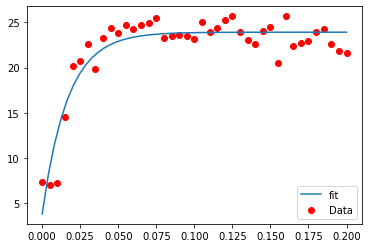

In [39]:
x_list = np.array(unique_param)*1e-3
nx = np.array(FL_count_list)*1e-6
nx_err = np.array(FL_count_err_list)*1e-6

sweepRange = 23.1*20 #[kHz]

def Landau_Zener_formula(x,*fit_param):
    return fit_param[1]*(1-np.exp(-np.pi**2*fit_param[0]**2*x/sweepRange))+fit_param[2]


def fit_result(fit_func, x_data_list, y_data_list, initial_param_list, yerr=None):
    if (yerr is None):
        param, cov = scipy.optimize.curve_fit(fit_func, x_data_list, y_data_list, p0 = initial_param_list)
    else:
        param, cov = scipy.optimize.curve_fit(fit_func, x_data_list, y_data_list, p0 = initial_param_list, sigma=yerr)
    perr = np.sqrt(np.diag(cov))
    x_fit_list = np.linspace(np.min(x_data_list),np.max(x_data_list))
    y_fit_list = []
    for num in x_fit_list:
        y_fit_list.append(fit_func(num, *param))
    return param, perr, x_fit_list, y_fit_list

para_ini =[60, np.mean(nx),np.min(nx)]
fitResultsOfSampleImage_list = fit_result(Landau_Zener_formula, x_list, nx, para_ini)

for i in range(len(para_ini)):
    print("fitParameter_"+str(i)+"="+str(fitResultsOfSampleImage_list[0][i])+"("+str(fitResultsOfSampleImage_list[1][i])+")")

plt.scatter(x_list,nx, label='Data',c="r")
plt.plot(fitResultsOfSampleImage_list[2],fitResultsOfSampleImage_list[3],label="fit")
plt.legend()

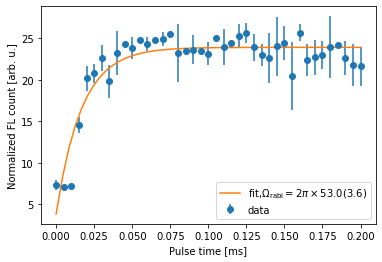

In [40]:
fig =plt.figure(figsize=[6,4])
rabi_freq = r'$\Omega_{\rm rabi} = 2 \pi \times %.01f (%.01f)$'%(fitResultsOfSampleImage_list[0][0], fitResultsOfSampleImage_list[1][0])
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Pulse time [ms]')
ax1.set_ylabel('Normalized FL count [arb. u.]')
ax1.errorbar(x_list,nx, nx_err,fmt='o',label ='data')
ax1.plot(fitResultsOfSampleImage_list[2],fitResultsOfSampleImage_list[3],label="fit,"+rabi_freq)
ax1.legend()